HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. How will you help this NGO to make a correct decision based on socio-economic and health factors?

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
data=pd.read_csv(r"C:\Users\DELNA ROSE\New folder\Downloads\Country-data.csv")

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [44]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [45]:
data.shape

(128, 10)

In [47]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [48]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.799219,37.427336,6.345000,45.127077,11149.851562,7.339727,69.694531,3.020781,6426.187500
std,33.964248,18.794958,2.213079,17.771282,9774.820899,6.145248,7.408596,1.465922,7142.127941
min,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,52.000000,1.230000,231.000000
25%,11.700000,23.550000,4.912500,31.375000,3225.000000,2.255000,64.450000,1.795000,1305.000000
50%,24.100000,34.000000,6.005000,43.500000,8510.000000,5.935000,71.350000,2.600000,3885.000000
75%,62.200000,50.275000,7.790000,57.650000,16050.000000,10.950000,75.850000,4.247500,8412.500000
max,137.000000,86.900000,11.800000,92.600000,45400.000000,23.600000,81.900000,6.550000,30800.000000


# Data cleaning:

In [46]:
#checking for duplicates
data.duplicated(subset = ['country'], keep = False).sum()

0

In [7]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Exploratory Data Analytics

<Figure size 288x288 with 0 Axes>

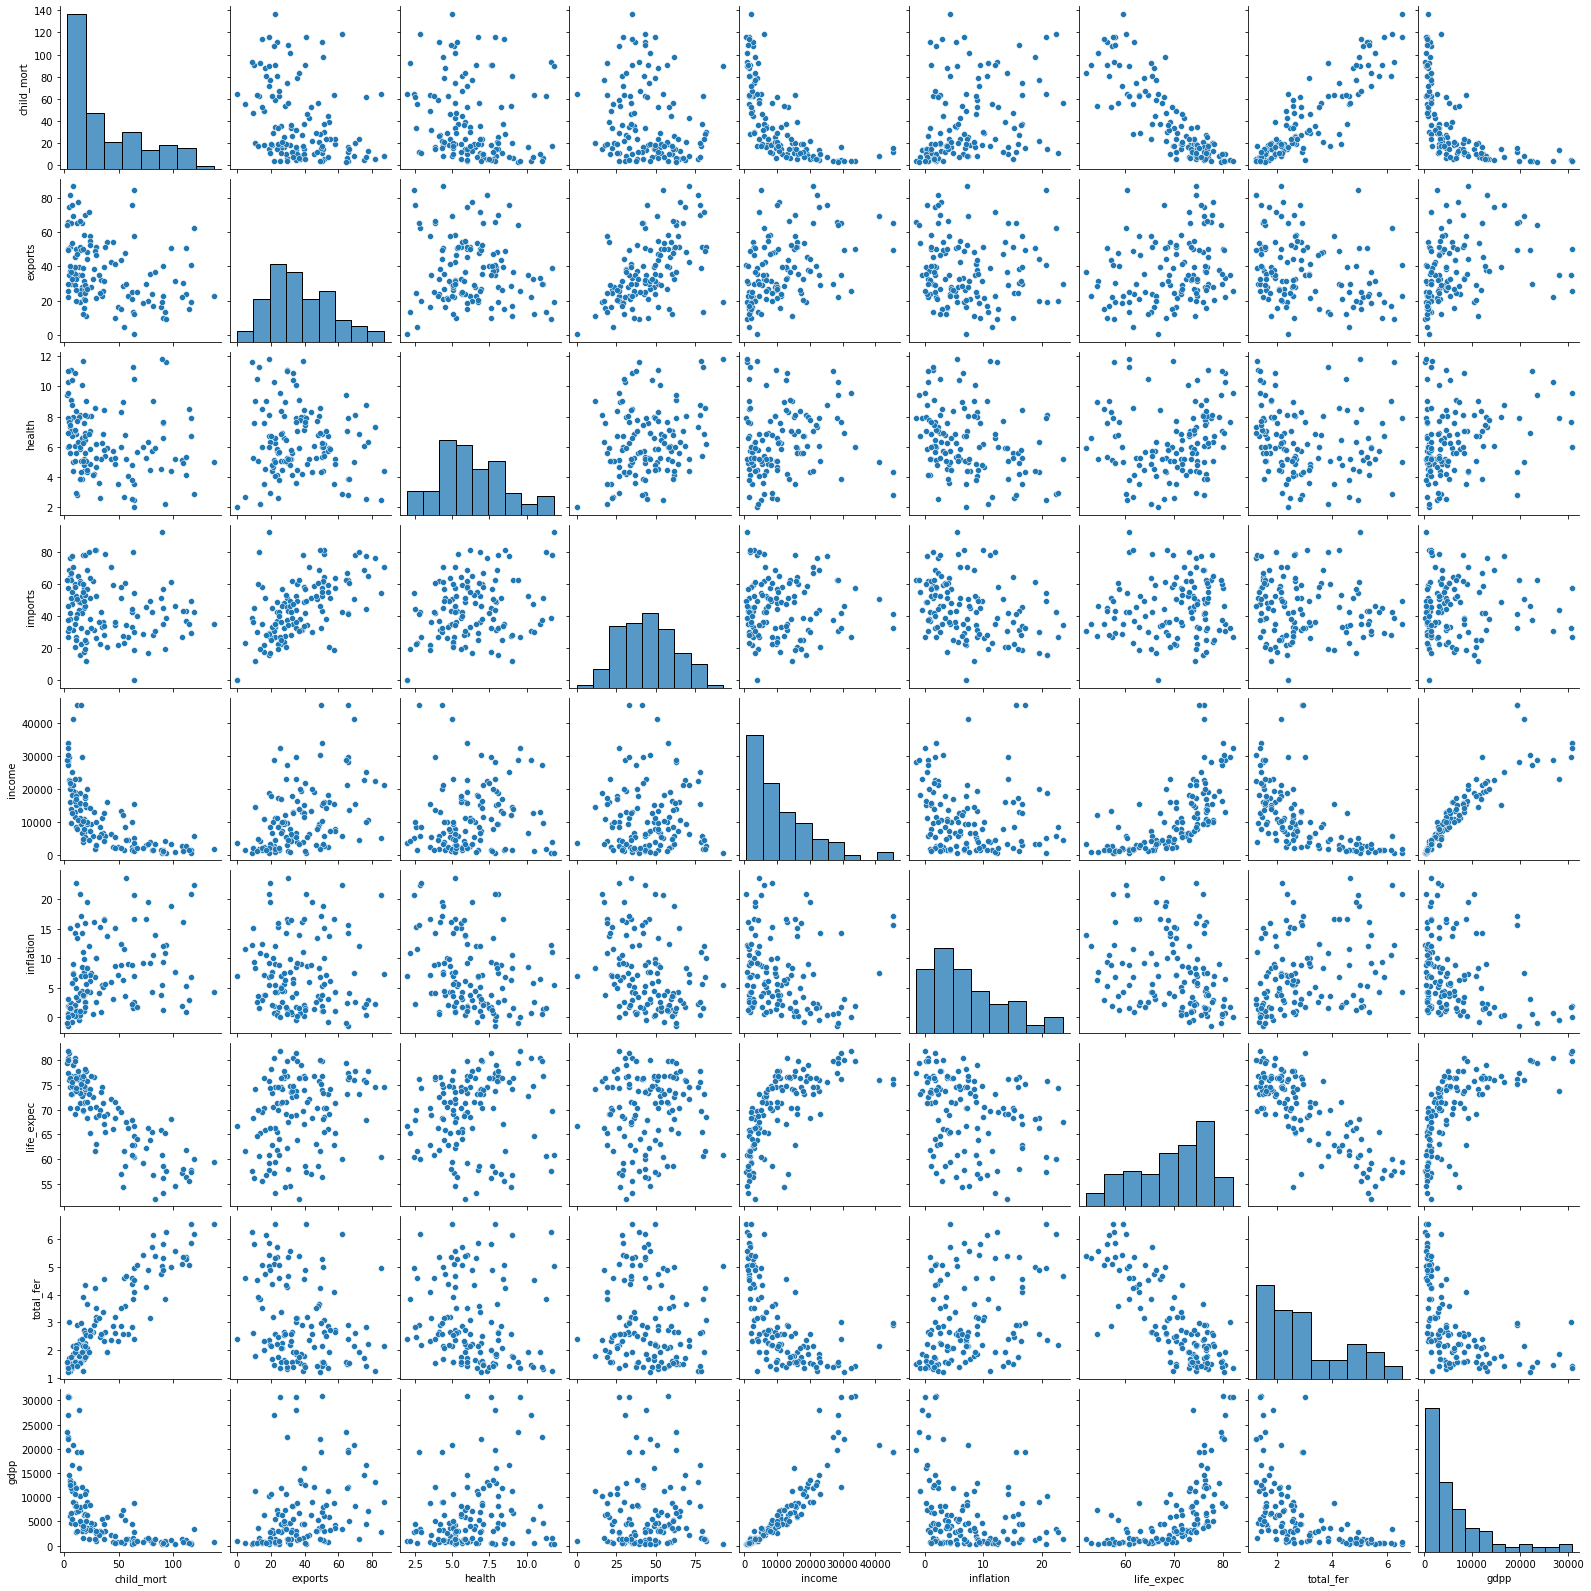

In [49]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(data)
plt.show()

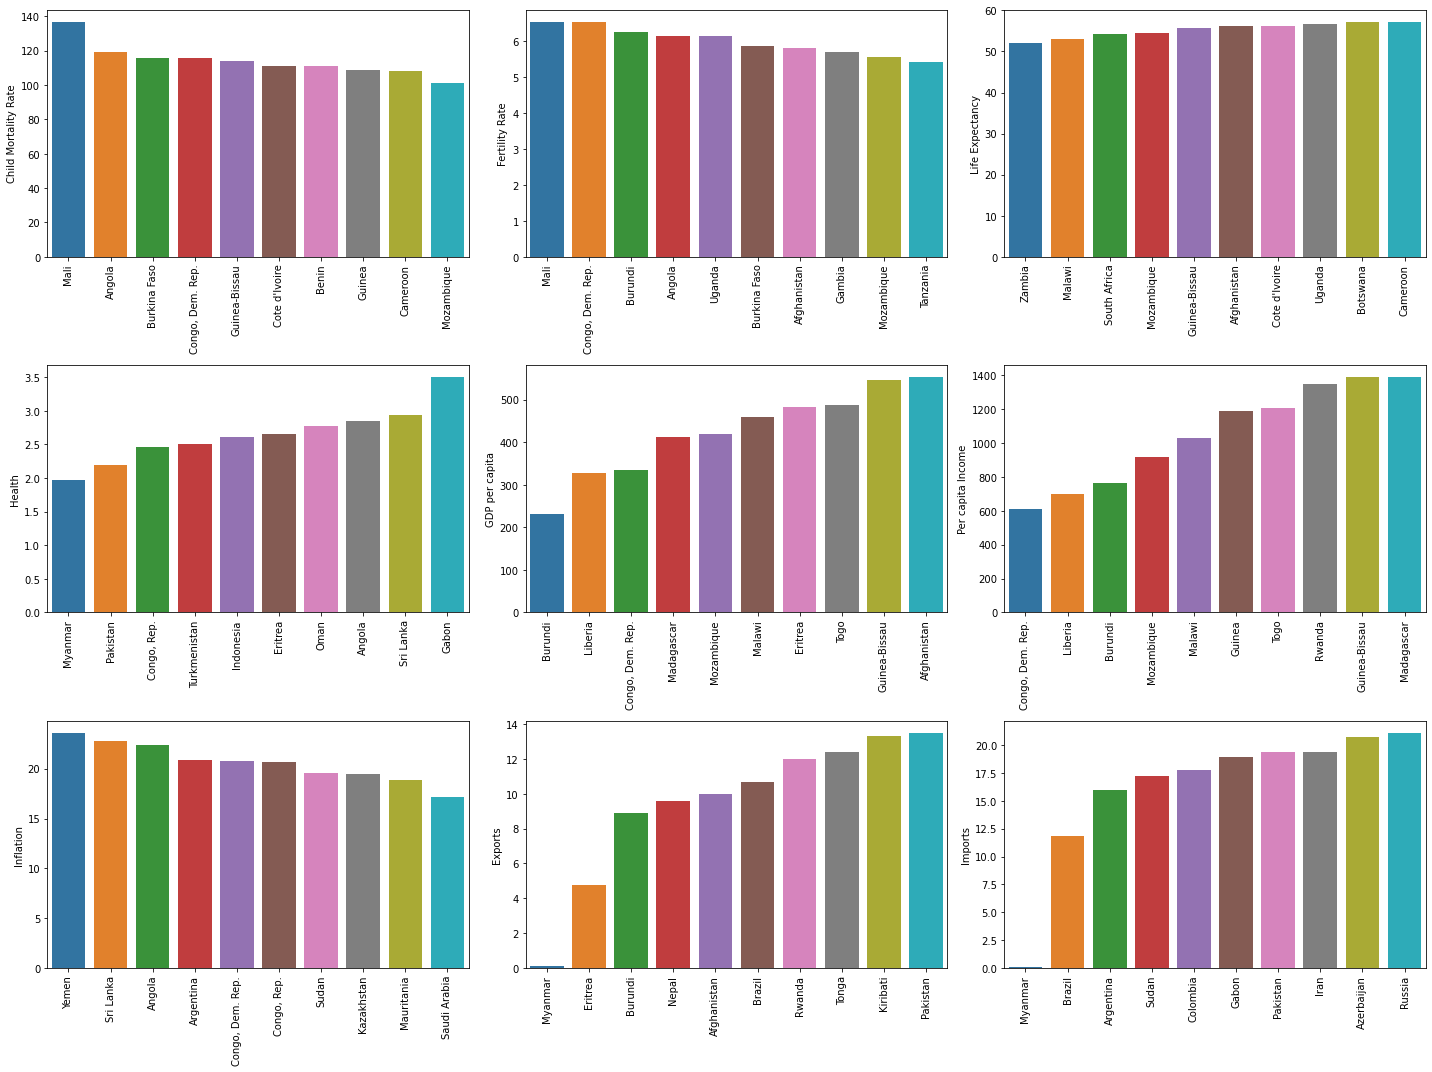

In [50]:
# To look on the lowest 10 countries for each factor.
fig, axs = plt.subplots(3,3,figsize = (20,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')

# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

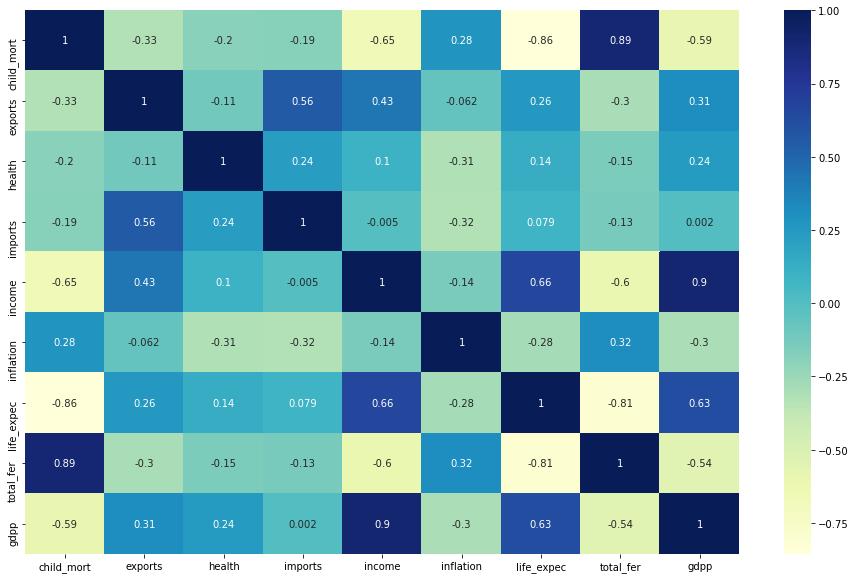

In [51]:
#check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

#high correlation exists between total_fer and child_mort, between gdpp and income,and between imports and exports

# Outlier Analysis

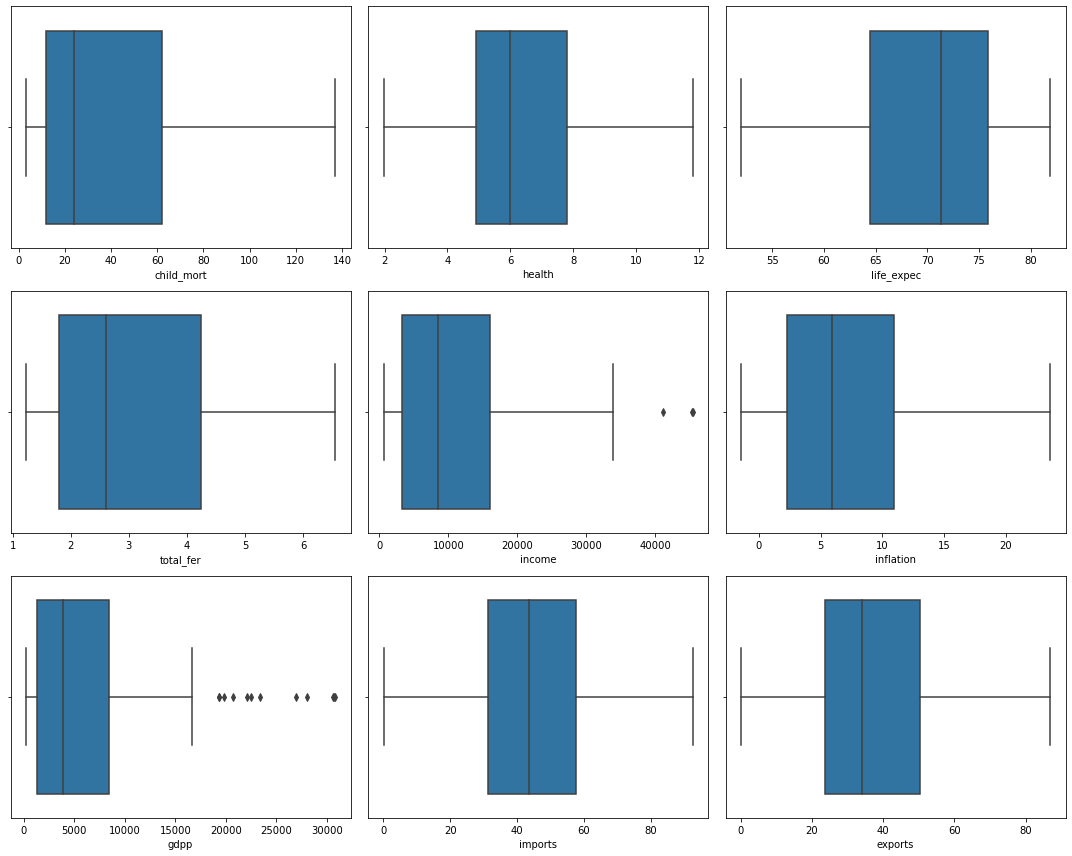

In [52]:
fig, axs = plt.subplots(3,3, figsize = (15,12))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])

plt.tight_layout()

In [53]:
# Saving one copy of orignal data.
data_help = data.copy()
data_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [54]:
# To identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = data_help['child_mort'].quantile([0.05,0.95]).values
data_help['child_mort'][data_help['child_mort'] <= percentiles[0]] = percentiles[0]
data_help['child_mort'][data_help['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['health'].quantile([0.05,0.95]).values
data_help['health'][data_help['health'] <= percentiles[0]] = percentiles[0]
data_help['health'][data_help['health'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['life_expec'].quantile([0.05,0.95]).values
data_help['life_expec'][data_help['life_expec'] <= percentiles[0]] = percentiles[0]
data_help['life_expec'][data_help['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['total_fer'].quantile([0.05,0.95]).values
data_help['total_fer'][data_help['total_fer'] <= percentiles[0]] = percentiles[0]
data_help['total_fer'][data_help['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['income'].quantile([0.05,0.95]).values
data_help['income'][data_help['income'] <= percentiles[0]] = percentiles[0]
data_help['income'][data_help['income'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['inflation'].quantile([0.05,0.95]).values
data_help['inflation'][data_help['inflation'] <= percentiles[0]] = percentiles[0]
data_help['inflation'][data_help['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['gdpp'].quantile([0.05,0.95]).values
data_help['gdpp'][data_help['gdpp'] <= percentiles[0]] = percentiles[0]
data_help['gdpp'][data_help['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['imports'].quantile([0.05,0.95]).values
data_help['imports'][data_help['imports'] <= percentiles[0]] = percentiles[0]
data_help['imports'][data_help['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data_help['exports'].quantile([0.05,0.95]).values
data_help['exports'][data_help['exports'] <= percentiles[0]] = percentiles[0]
data_help['exports'][data_help['exports'] >= percentiles[1]] = percentiles[1]


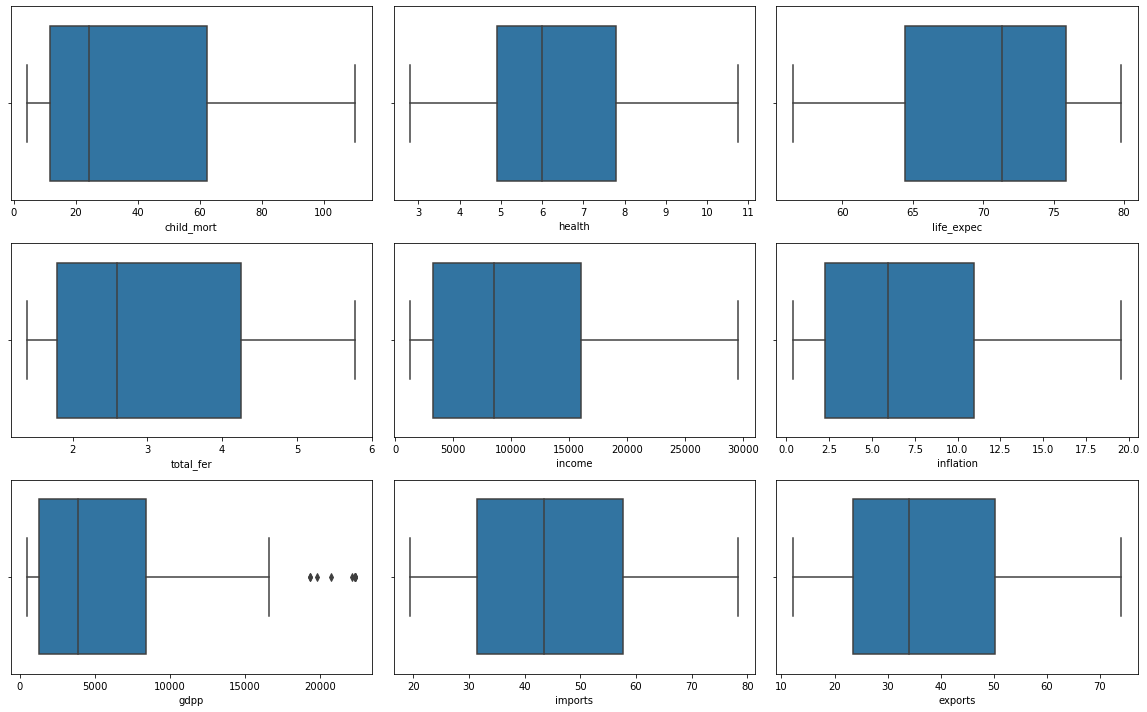

In [55]:
fig, axs = plt.subplots(3,3, figsize = (16,10))

plt1 = sns.boxplot(data_help['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data_help['health'], ax = axs[0,1])
plt3 = sns.boxplot(data_help['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data_help['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data_help['income'], ax = axs[1,1])
plt6 = sns.boxplot(data_help['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data_help['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data_help['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data_help['exports'], ax = axs[2,2])

plt.tight_layout()

# Scaling the data

In [57]:

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data_help[varlist] = scaler.fit_transform(data_help[varlist])

# PCA

In [58]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)



In [59]:
X = data_help.drop(['country'],axis=1)
y = data_help['country']
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [60]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [ ]:
#plot the principal components and try to make sense of them.
#We will plot original features on the first 2 principal components as axes

In [61]:
pca.components_

array([[-0.43339952,  0.23145433,  0.13338932,  0.12587836,  0.41936279,
        -0.19300973,  0.4199503 , -0.41723077,  0.40174369],
       [-0.07329125, -0.39317938, -0.21265869, -0.74844977,  0.19991992,
         0.36752292,  0.16116524, -0.08744598,  0.16116914],
       [ 0.00255464,  0.57535748, -0.65599277,  0.12980971,  0.10542319,
         0.4583609 , -0.0175301 ,  0.01342742, -0.00915497],
       [ 0.31062996,  0.23827524,  0.40875581, -0.07323022,  0.39523532,
         0.20081587, -0.30444596,  0.38478685,  0.48683029],
       [-0.22808131, -0.00944647,  0.51280132,  0.18899232, -0.13800278,
         0.7288126 ,  0.09481828, -0.16745713, -0.2489205 ],
       [-0.00572434, -0.52443503, -0.22434323,  0.53049786,  0.09489795,
         0.17125096,  0.33713282,  0.41368683,  0.26466851],
       [-0.10621303, -0.34404232, -0.16024149,  0.2609023 ,  0.16515537,
         0.08146259, -0.70341111, -0.46733952,  0.17175699],
       [-0.80179897,  0.04983158, -0.01811668, -0.115121  , -0

In [62]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.433400,-0.073291,child_mort
1,0.231454,-0.393179,exports
2,0.133389,-0.212659,health
3,0.125878,-0.748450,imports
4,0.419363,0.199920,income


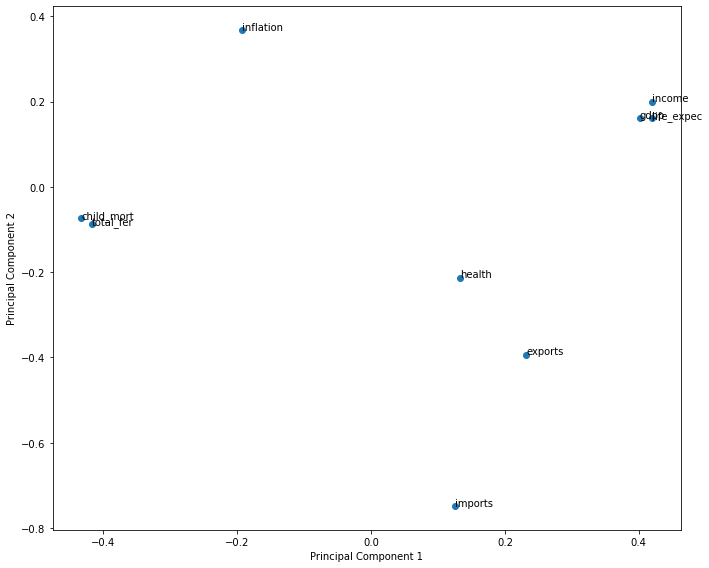

In [63]:
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [64]:
pca.explained_variance_ratio_

array([0.48768923, 0.16117892, 0.14131395, 0.08574555, 0.0699751 ,
       0.02271968, 0.01784903, 0.01012532, 0.00340321])

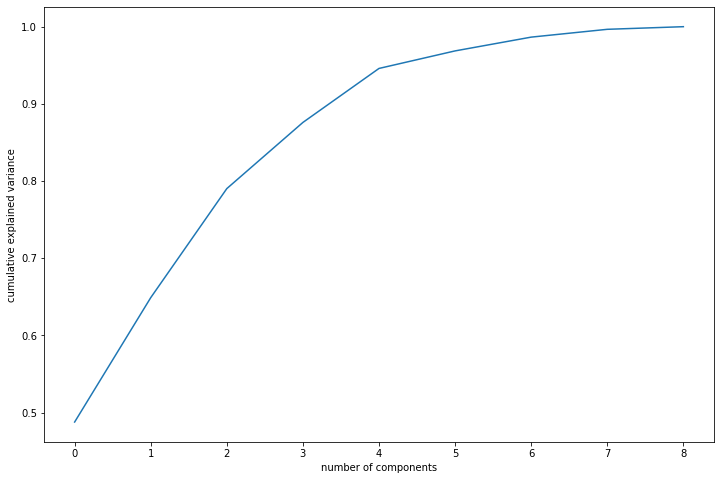

In [65]:
#cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

shows 4 components are enough to describe 95% of the variance in the dataset
We will choose 4 components for our modeling

In [66]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)


In [67]:
df_pca = pca_final.fit_transform(X)
df_pca.shape



(128, 4)

In [68]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,3.422175,0.393513,1.071421,0.942324
1,-0.914449,-0.098496,0.623621,-1.174194
2,-0.056536,-1.627086,-1.263986,-0.357839
3,3.067811,0.053697,-2.869633,1.455560
4,-2.221489,0.542549,-0.093690,-0.289872


In [69]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())


<AxesSubplot:>

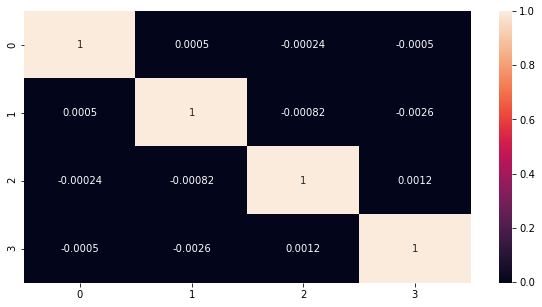

In [70]:
#correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [71]:

from sklearn.cluster import KMeans

# Hopkins Statistics

In [72]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [73]:
hopkins(df_pca)


0.659665429169172

# Hierarchical clustering

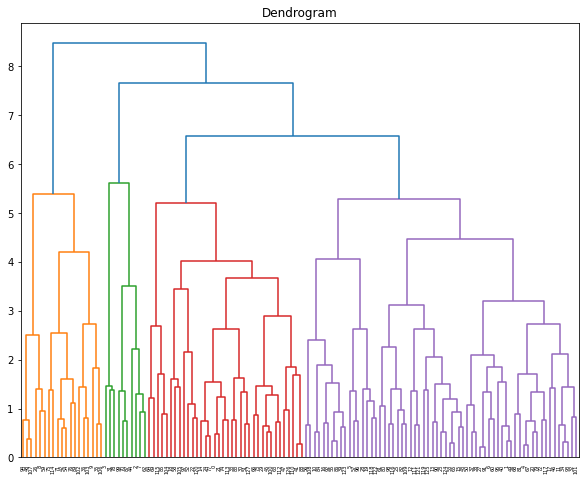

In [74]:
plt.figure(figsize=(10,8))
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.title('Dendrogram')
plt.show()


From the dedrogram it is evident that  n = 5 is most optimum.

In [75]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,3.422175,0.393513,1.071421,0.942324,0
1,-0.914449,-0.098496,0.623621,-1.174194,1
2,-0.056536,-1.627086,-1.263986,-0.357839,2
3,3.067811,0.053697,-2.869633,1.455560,3
4,-2.221489,0.542549,-0.093690,-0.289872,1


In [76]:
pca_cluster_hc = pd.concat([data_help['country'],df_pca_hc], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
pca_cluster_hc.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,3.422175,0.393513,1.071421,0.942324,0.0
1,Albania,-0.914449,-0.098496,0.623621,-1.174194,1.0
2,Algeria,-0.056536,-1.627086,-1.263986,-0.357839,2.0
3,Angola,3.067811,0.053697,-2.869633,1.455560,3.0
4,Antigua and Barbuda,-2.221489,0.542549,-0.093690,-0.289872,1.0


In [77]:
clustered_data_hc = pca_cluster_hc[['country','ClusterID']].merge(data, on = 'country')
clustered_data_hc.head()


,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1.0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,2.0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,3.0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [78]:
hc_clusters_child_mort = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [79]:
df = pd.concat([pd.Series(list(range(0,5))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0.0,0,38.778571,35.907143,6.520000,48.271429,11353.928571,5.623929,69.492857,3.039286,6374.142857
1.0,1,36.925490,39.042549,6.311569,45.198039,11560.568627,6.399157,70.276471,2.878039,6875.235294
2.0,2,48.350000,34.800000,4.510000,37.825000,7840.000000,13.860000,71.475000,3.432500,2900.000000
3.0,3,70.050000,55.300000,5.445000,55.950000,7685.000000,15.415000,67.950000,4.910000,3605.000000
4.0,4,47.442857,29.794929,6.245714,39.297564,9850.857143,9.491429,68.192857,3.127857,5356.857143


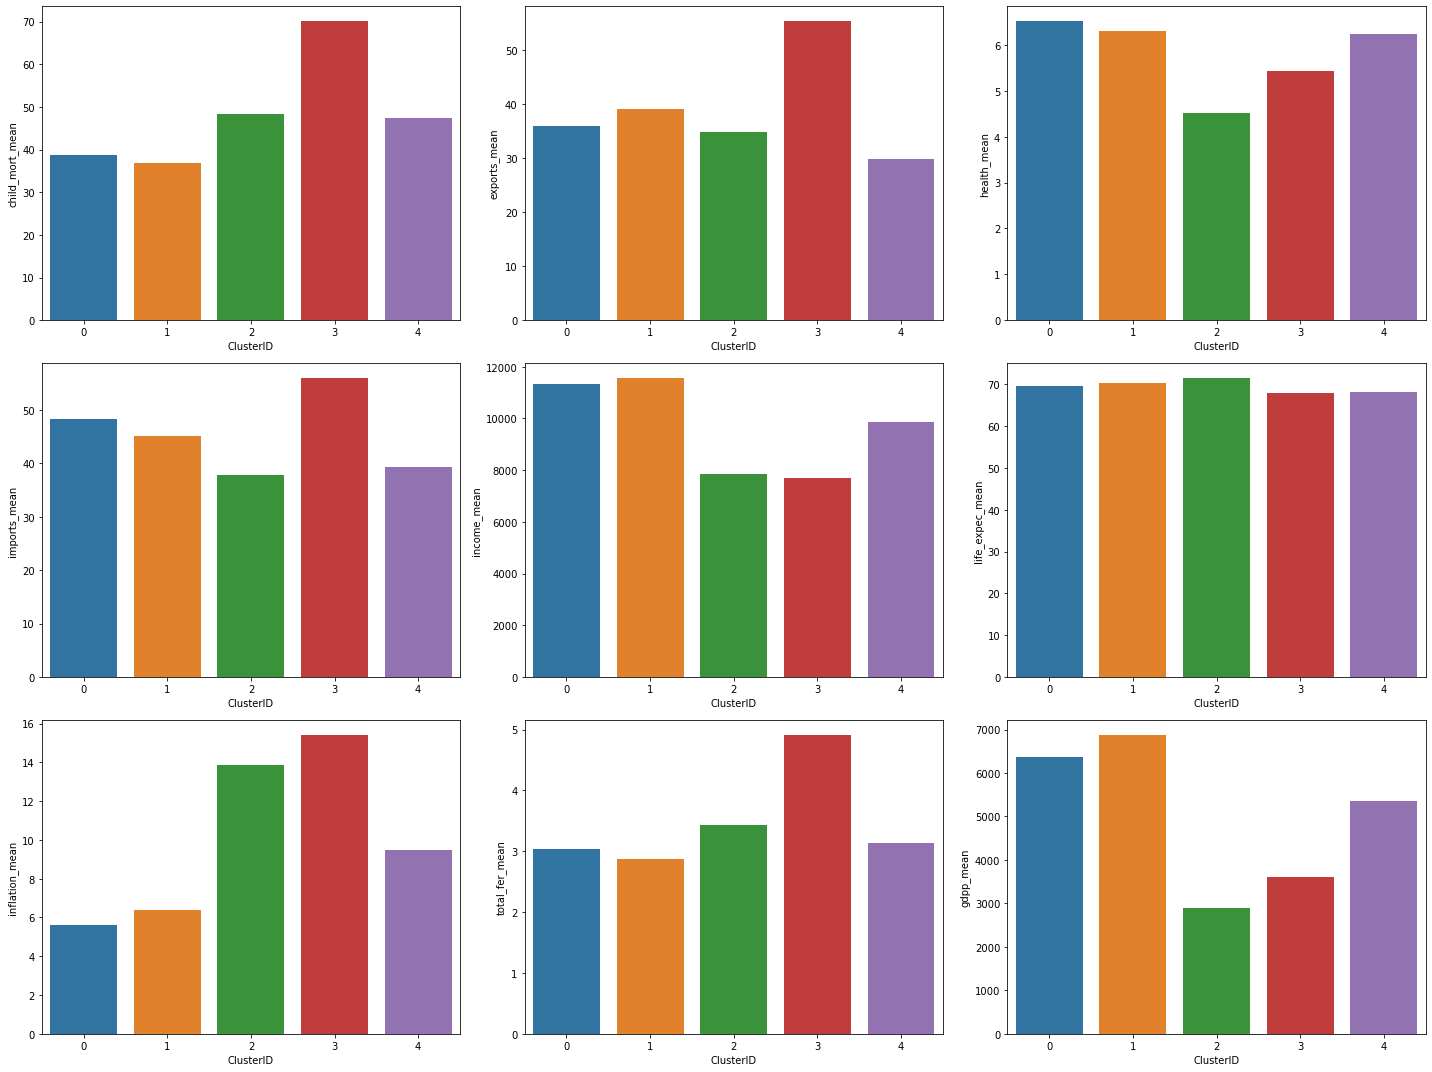

In [80]:
fig, axs = plt.subplots(3,3,figsize = (20,15))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [81]:
clustered_data_hc[clustered_data_hc.ClusterID == 0].country.values

array(['Afghanistan', 'Belarus', 'Bhutan', 'Botswana', 'Brazil',
       'Bulgaria', 'Cape Verde', 'Chile', 'Croatia', 'Dominican Republic',
       'Egypt', 'Estonia', 'Fiji', 'Guinea', 'Guinea-Bissau', 'India',
       'Israel', 'Kyrgyz Republic', 'Latvia', 'Liberia', 'Mali',
       'Mauritius', 'Montenegro', 'Morocco', 'Oman', 'Philippines',
       'Rwanda', 'Samoa'], dtype=object)

This shows Cluster with ClusterID as 0, is the cluster of most backward country.
the Countries on which we require to focus more are:

Afghanistan,Benin,Botswana,Burkina Faso, Burundi,Cameroon, Central African Republic, Chad, Comoros,Congo, Dem. Rep., Cote d,Ivoire, Eritrea, Gabon, Gambia,
Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya,Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi,Mali, Micronesia, Fed. Sts., Mozambique, Namibia, Niger,
Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone,Solomon Islands, South Africa, Sudan, Tajikistan,Tanzania, Timor-Leste, Togo.